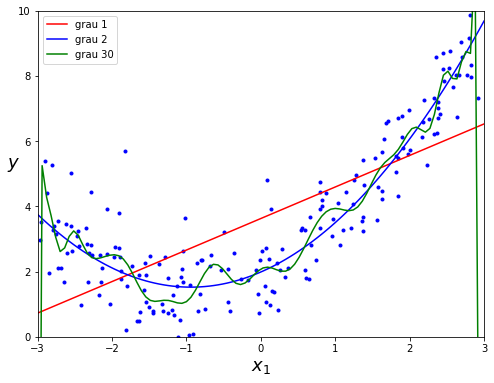

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

RAND_SEED = 42

np.random.seed(RAND_SEED)

m = 200
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


plt.figure(figsize=(8,6))
plt.plot(X, y, "b.", linewidth=3)

X_test = np.linspace(-3, 3, num=100).T

# Experimento 1: grau baixo.
poly_reg_1 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())
    ])
poly_reg_1.fit(X, y)
y_test = poly_reg_1.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_test, 'r-', label='grau 1')

# Experimento 2: grau adequdo.
poly_reg_2 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())
    ])
poly_reg_2.fit(X, y)
y_test = poly_reg_2.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_test, 'b-', label='grau 2')

# Experimento 3: grau muito alto.
poly_reg_30 = Pipeline([
        ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())
    ])
poly_reg_30.fit(X, y)
y_test = poly_reg_30.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_test, 'g-', label='grau 30')

plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [2]:
poly_reg_1.named_steps['lin_reg'].coef_, poly_reg_1.named_steps['lin_reg'].intercept_, 

(array([[1.70599862]]), array([3.5335268]))

In [3]:
poly_reg_2.named_steps['lin_reg'].coef_, poly_reg_2.named_steps['lin_reg'].intercept_, 

(array([[1.74378864, 1.37507481]]), array([3.5335268]))

In [4]:
poly_reg_30.named_steps['lin_reg'].coef_, poly_reg_30.named_steps['lin_reg'].intercept_, 

(array([[ 2.42850318e+00, -1.99486425e+01, -1.09884841e+02,
          1.39903011e+03,  2.44826047e+03, -3.29335526e+04,
         -1.70482181e+04,  4.23322917e+05, -3.59932113e+04,
         -3.46301392e+06,  1.32124409e+06,  1.93573274e+07,
         -9.75757431e+06, -7.67871950e+07,  4.04339222e+07,
          2.20680453e+08, -1.08932435e+08, -4.63649821e+08,
          2.00341555e+08,  7.11314991e+08, -2.54542468e+08,
         -7.87041161e+08,  2.20323298e+08,  6.10884453e+08,
         -1.24209213e+08, -3.15306612e+08,  4.11568852e+07,
          9.71180506e+07, -6.08451627e+06, -1.34992429e+07]]),
 array([3.53352698]))

# Regularização

Conforme vimos acima, um modelo muito complexo pode sofrer do problema de *overfitting*. Uma forma de domar a complexidade do modelo é limitar o número de *features*. Por exemplo, usando *features* polinomiais, podemos limitar o grau do polinômio.

Outra forma de tratar a complexidade dos modelos é através da estratégia de *regularização*. Trata-se do seguinte:

1. Definimos métricas diferentes de erro para a fase de treinamento e a fase de testes.
    - Na fase de treinamento usamos uma *métrica regularizada*
    - Na fase de testes usamos uma métrica convencional
    
2. A métrica regularizada funciona assim: trata-se da métrica convencional acrescida de um termo que *penaliza a complexidade do modelo*.

Com isso favorecemos modelos de complexidade reduzida, mesmo que o grau do polinômio seja alto.

## Ridge, Lasso e ElasticNet

Nestas modalidades de regularização adicionamos uma penalidade para a norma do vetor de parâmetros:

- Ridge: a penalidade é proporcional à norma $L_2$ do vetor de parâmetros.

- Lasso: a penalidade é proporcional à norma $L_1$ do vetor de parâmetros.

- ElasticNet: uma soma ponderada de penalidades proporcionais às normas $L_1$ e $L_2$ do vetor de parâmetros é aplicada.


**Atividade:** O material do livro-texto, na seção "Regularized Linear Models" está muito bom, estude este material e responda:

- Qual a diferença entre *ridge regression*, *lasso regression*, e *elastic net*?

**R:** Regularização limita o *overfitting*

    - Ridge: ajuda com features colineares. Valores das features são "realistas", não chegam na casa dos milhões, pois existe uma restição por uma região viável (círcunferêcia... rever lousa da aula)
    - Lasso: zera alguns coeficientes (boa forma de selecionar features); por causa do formato da região viável (diamante), as elipces (MSE) crescem até chegar na região viável e muitas vezes isso acontece em uma quina (muitos coeficientes são zerados).
    - ElasticNet: combinação de Ridge com Lasso; 
    
Obs: olhar interpretações geométricas na lousa da aula

Eis aqui uma demonstração das várias regularizações:

In [29]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def experiment(msg, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    
    model = pipeline.named_steps['lin_reg']
    print('{}: \nintercept = {},\ncoefs = {}'.format(msg, model.intercept_, model.coef_))
    
    y_pred = pipeline.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
    print('RMSE: {}'.format(RMSE))
    print()
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_SEED)

alpha = 1

# Testa o fit do poly_reg_2.
experiment('Fit de grau 2, sem regularização', poly_reg_2, X_train, y_train, X_test, y_test)

# Testa o fit do poly_reg_30.
experiment('Fit de grau 30, sem regularização', poly_reg_30, X_train, y_train, X_test, y_test)

# Testa o fit da regularização ridge. 
poly_reg_ridge = Pipeline([
        ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", Ridge(alpha=alpha))
    ])
experiment('Fit de grau 30, regularização ridge', poly_reg_ridge, X_train, y_train, X_test, y_test)

# Test o fit da regularização lasso.
poly_reg_lasso = Pipeline([
        ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", Lasso(alpha=alpha))
    ])
experiment('Fit de grau 30, regularização lasso', poly_reg_lasso, X_train, y_train, X_test, y_test)

# Test o fit da regularização elastic net.
poly_reg_elasticnet = Pipeline([
        ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
        ("std_scaler", StandardScaler()), 
        ("lin_reg", ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=RAND_SEED))
    ])
experiment('Fit de grau 30, regularização elastic net', poly_reg_elasticnet, X_train, y_train, X_test, y_test)

Fit de grau 2, sem regularização: 
intercept = [3.51810673],
coefs = [[1.79596938 1.3530664 ]]
RMSE: 1.0355659626527138

Fit de grau 30, sem regularização: 
intercept = [3.51810685],
coefs = [[ 2.00290531e+00 -1.79317427e+01 -1.80452470e+02  1.50303701e+03
   5.62389186e+03 -3.82815344e+04 -7.57862182e+04  5.07696276e+05
   5.89803619e+05 -4.15769129e+06 -2.98494710e+06  2.28223811e+07
   1.04603454e+07 -8.78704897e+07 -2.62885050e+07  2.43485709e+08
   4.81982483e+07 -4.91615962e+08 -6.46511143e+07  7.24018687e+08
   6.27474152e+07 -7.69269414e+08 -4.28443972e+07  5.74058947e+08
   1.94827058e+07 -2.85358056e+08 -5.28400993e+06  8.48142278e+07
   6.44797005e+05 -1.13992384e+07]]
RMSE: 1.2177378090305946

Fit de grau 30, regularização ridge: 
intercept = [3.51810673],
coefs = [[ 2.12005761  1.1215818  -0.27413884  0.55296724 -0.29943328 -0.08148511
   0.01743287 -0.3297324   0.15998131 -0.30502322  0.14788618 -0.16632901
   0.06291657 -0.01001474 -0.035329    0.11785035 -0.11256006  0.

**Atividade:** 

- Coloque o $\alpha$ bem alto, o que acontece?

- Coloque o $\alpha$ muito baixo, o que acontece?

- Explique a diferença observada entre sem regularização / regularização ridge / regularização lasso / regularização elastic net.

**R:**

- $\alpha$ alto: RMSE dos casos com regularização (que são afetados pela mudança do $\alpha$) aumentam, indicando que piorou.

- $\alpha$ baixo: tende a se equiparar ao RMSE do fit sem regularização.

Sem regularização se mantém igual, independente de $\alpha$, já que o $\alpha$ não faz parte do cálculo de fit sem regularização.

Já os casos com regularização, temos, nos três casos, uma piora tanto quando o $\alpha$ é alto quanto baixo. 


## Regularização por parada prematura (*early stopping*)

Um modo bizarro de regularização é o chamado *early stopping*.

Considere o algoritmo de treinamento *gradient descent*. Quanto mais iteramos neste algoritmo (em machine learning, as iterações são chamadas **epochs**), menor o *erro de treinamento*. Porém, se acompanharmos o *erro de validação* à cada epoch, vemos que este decresce com as epochs até um certo ponto, *e depois começa a subir novamente*!

<img src="early_stopping_plot.png" alt="Regularização por parada prematura" style="width: 600px;"/>


**Atividade:** Por que isso acontece?

**R:** Ao iterarmos muitas vezes no training set, acabamos caindo num overfitting.
Logo, se parar as iterações prematuramente, evitamos esse erro

Há estudos para observar o motivo disso.

Continuando:

Portanto, se detectarmos que o erro de validação está realmente subindo, podemos parar com o processo de treinamento e adotar o modelo resultante como o nosso modelo treinado! Esta estratégia de *parada prematura* (early stopping) é surpreendentemente simples e eficaz!

# Interpretabilidade

In [7]:
import statsmodels.api as sm

In [8]:
poly_5 = PolynomialFeatures(degree=5, include_bias=True)
Xb = poly_5.fit_transform(X)

model = sm.OLS(y, Xb)
results = model.fit()

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     205.9
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.49e-75
Time:                        15:11:03   Log-Likelihood:                -274.19
No. Observations:                 200   AIC:                             560.4
Df Residuals:                     194   BIC:                             580.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9727      0.137     14.420      0.000       1.703       2.242
x1             1.3039      0.175      7.437      0.000       0.958       1.650
x2             0.5493      0.094      5.841      0.000       0.364       0.735
x3            -0.1090      0.078     -1.397      0.164      -0.263       0.045
x4            -0.0033      0.012     -0.281      0.779      -0.027       0.020
x5             0.0079      0.008      1.013      0.313      -0.007       0.023
==============================================================================
Omnibus:                        8.126   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                9.983
Skew:                           0.307   Prob(JB):                      0.00680
Kurtosis:                       3.906   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Atividade:**

Experimente com diferentes valores para o grau do polinômio: 1, 2, 5, 10. Relate o que você observou

**R:**
```
Para os polinômios de graus 1 e 2, temos um p-value zerado, ou seja são bons coeficientes.

À medida que aumentamos o grau do polinômio, começamos a obter coeficientes não ideias para o nosso modelo:

    - Grau 5: os coeficientes cúbico, 4 e 5 apresentam um p-value que não rejeita a hipótese nula, ou seja, são coeficientes ruins para o modelo.
    - Grau 10: acontece a mesma coisa que no Grau 5, as features não são adequadas para o modelo. 

```

In [10]:
degrees = [1, 2, 5, 10]

results = []

for i in degrees: 
    poly = PolynomialFeatures(degree=i, include_bias=True)
    Xb = poly.fit_transform(X)

    model = sm.OLS(y, Xb)
    results.append(model.fit())

In [17]:
for i in range(len(degrees)):
    print("______________________________________________________________________________")
    print(f"Grau {degrees[i]}")
    res = results[i]
    print(res.summary())
    print("______________________________________________________________________________")
    print("\n")

______________________________________________________________________________
Grau 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           2.53e-32
Time:                        15:16:50   Log-Likelihood:                -387.42
No. Observations:                 200   AIC:                             778.8
Df Residuals:                     198   BIC:                             785.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------